# Practical 2: Forecasting Housing Prices
<hr>

In [2]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
import sys
print(sys.executable)
!{sys.executable} -m pip install -U pip setuptools wheel
!{sys.executable} -m pip install numpy pandas scipy patsy
!{sys.executable} -m pip install statsmodels

/home/codespace/.python/current/bin/python


## The California Housing data set

The "California Housing" data set is a widely used data set to demonstrate forecasting methods. As the name suggests, the data set concerns the valuation of real estate. It comprises socio-demographic information concerning the area of a property and a dependent (aka target) variable, which gives the median house value for California districts. This data was derived from the 1990 U.S. census. 

Being so popular, the data set is readily available in standard Python libraries. Execute the following code to load the data set from `sklearn.datasets` and familiarize yourself with the data description.

In [4]:
# Downloading the data set
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)  # get the data as a Pandas dataframe

print(california_housing.DESCR)  # the data even comes with a nice description

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

The `sklearn` library provides the data in a specific format. Feature values and the target variable are already separated. The be consistent with our standard notation, we extract the feature values and target and store it, as usual, in variables $X$ and $y$, respectively. Of course, this is a good opportunity to also take a quick look into the data.

In [5]:
X = california_housing.data

X.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
y = california_housing.target
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

### Descriptive Statistics

In [7]:
y.describe()  # compute descriptive statistics that summarize the target's distribution

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

In [8]:
X.describe() # do the same for all features

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


### Explanatory data analysis (EDA)
To better understand the data, we consider a few standard EDA operations. They comprise the analysis of histograms and/or box-plots of the target and the features. Also, we consider the (linear) correlation between features and the target to obtain some initial evidence as to which features might be important. 

While we only create the plots in the following, never forget that each plot - and more generally every result - deserves a careful analysis and discussion. Therefore, make sure to examine each plot and note down your key observations.

Without any strong reason, we use the `seaborn` library for plotting in this notebook. Many data scientists prefer `seaborn` over `Matplotlib`. Hence, we illustrate it here.

#### Target Variable: Medium House Value

##### Analyzing the distribution of the target by means of a histogram

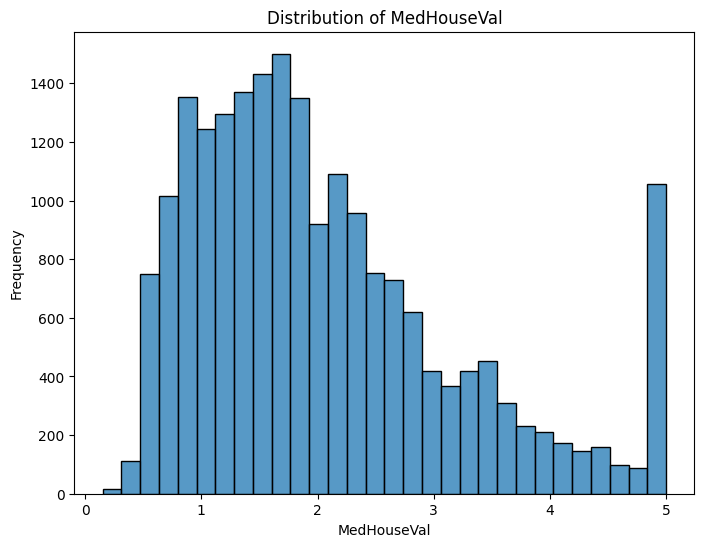

In [9]:
# Histogram of target
plt.figure(figsize=(8, 6))
sns.histplot(y, bins=30, kde=False, edgecolor='k')
plt.xlabel(y.name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {y.name}')
plt.show()


##### Analyzing the distribution of the target by means of a boxplot

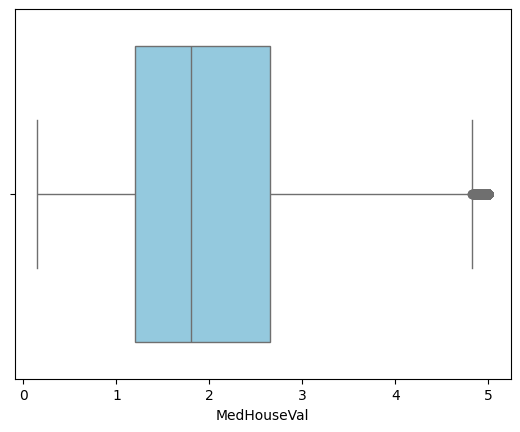

In [10]:
sns.boxplot(x=y, color='skyblue');

#### Features

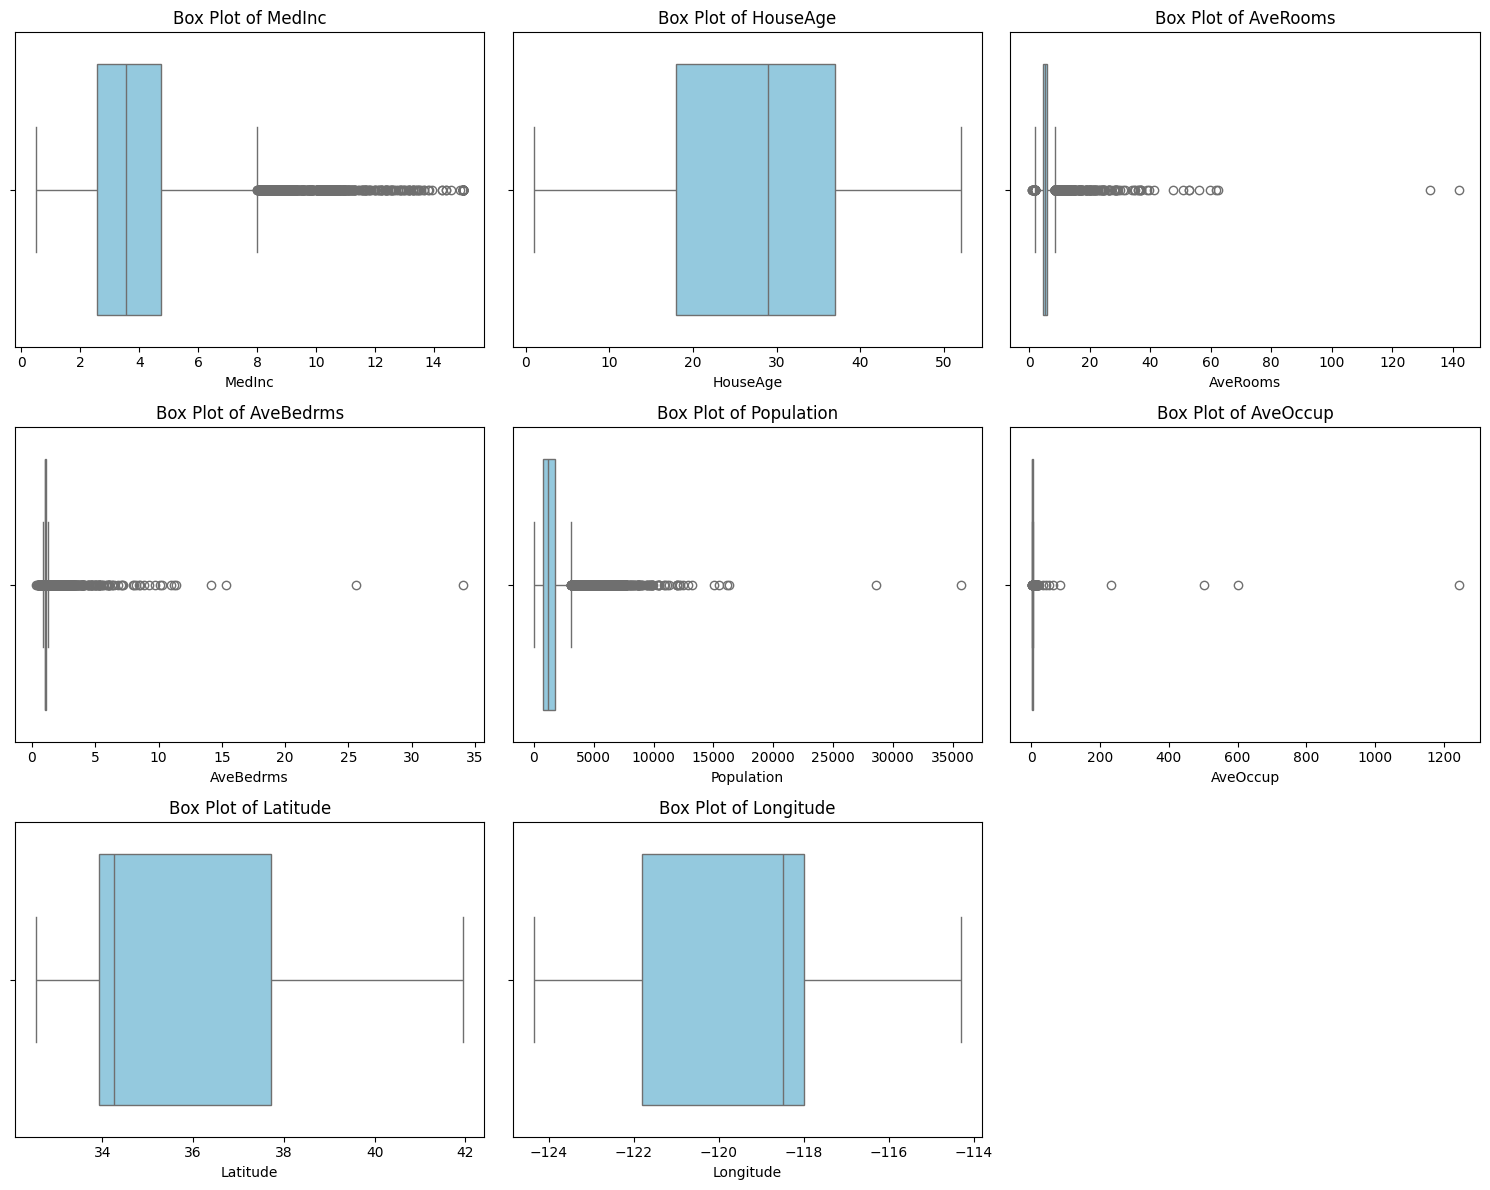

In [11]:
#3x3 matrix of box-plots for all the features
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # Create a 3x3 grid of subplots
axes = axes.flatten() # Flatten the axes for easier iteration

# Loop through each feature and create a box plot
for i, feature in enumerate(X.columns):
    sns.boxplot(x=X[feature], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_xlabel(feature)

# Remove empty subplots
for i in range(len(X.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Adjust layout
plt.show()

#### Correlation analysis
Having obtained an idea about the *univariate* distributions, we also take a look at the correlation structure in the data.

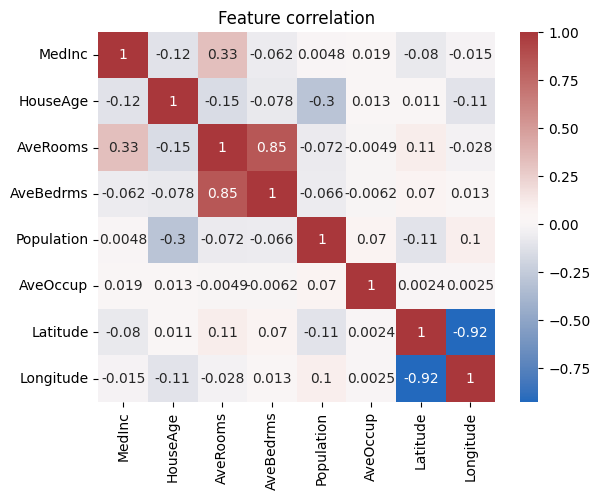

In [12]:
# Correlation among the features
corr_matrix = X.corr()  
sns.heatmap(corr_matrix, cmap='vlag', annot=True)
plt.title('Feature correlation')
plt.show()

MedInc        0.688075
HouseAge      0.105623
AveRooms      0.151948
AveBedrms    -0.046701
Population   -0.024650
AveOccup     -0.023737
Latitude     -0.144160
Longitude    -0.045967
dtype: float64


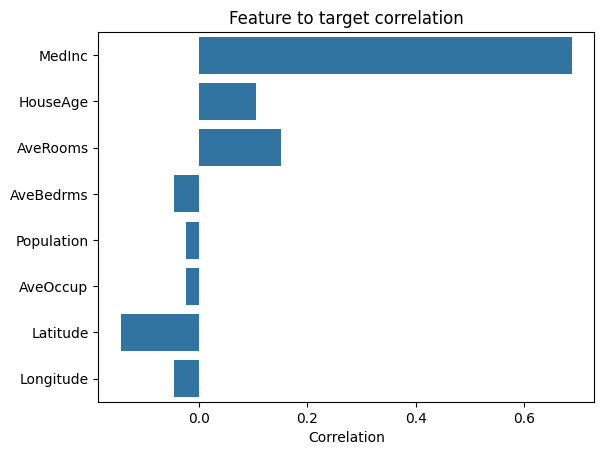

In [13]:
# Correlation between individual features and the target
rho = X.corrwith(y)
print(rho)

sns.barplot(x=rho, y=X.columns.tolist(), orient='h')
plt.title('Feature to target correlation')
plt.xlabel('Correlation')
plt.show()

## Linear Regression
Having completed our initial data screening and explorative analysis, we proceed by estimating a linear regression model to deepen our understanding of how the features and the target are related to another.

To that end, we consider the library `statsmodels`, a popular and powerful library for statistical modeling, which includes ordinary least squares (OLS) estimator. We provide all codes for the model estimation below.

In [14]:
import sys; print(sys.version)


3.12.1 (main, Jul 10 2025, 11:57:50) [GCC 13.3.0]


In [15]:
import statsmodels.api as sm 

# OLS model estimation
model = sm.OLS(y,
               sm.add_constant(X)  # include an intercept
              ) 

results = model.fit()  # fit the model

The library provides a neat function, `.summary()` to obtain a concise overview of the results of regression analysis. It includes key information like R-squared, estimated coefficients, standard errors, and p-values. This summary is crucial for evaluating model adequacy and feature significance.

In [16]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Fri, 07 Nov 2025   Prob (F-statistic):               0.00
Time:                        09:57:49   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9419      0.659    -56.067      0.0

# Exercises
Based on the above analysis, draw on your data science expertise to answer the following questions: 

## 1. What are the two most and the two least important features?
Briefly note what statistics/results you have considered to make your choice.

**Enter your answer in this markup cell:**




## 2. Scatter Plots
Create, for each of the selected features, a scatter plot of the selected feature against the target. Display these plots in a 2x2 grid

In [17]:
# Code for plotting


## 3. Model Reestimation
Remove the two least important features from the data and reestimate the model. Briefly discuss whether this step has improved the model.

In [18]:
# Code to reestimate the model


**Did the model improve? Briefly discuss:**

## 4. Switching the Library
We have used `statsmodels` up to this point. However, the go-to library when it comes to machine learning is a different library called [scikit-learn](https://scikit-learn.org/stable/), typically abbreviated as `sklearn`.

Import that library. Then, using once more the data set with all features included, create another linear regression model using the class `linear_model.LinearRegression()`. Compare the coefficients between this model and the one we estimated above using `statsmodels.api.OLS`. They should be pretty much identical. Please verify that they are.

In [19]:
# Code to estimate linear regression using sklearn.


In [20]:
# Code to compare regression coefficients


## 5. Prediction 
We next use our regression model for prediction. Feeding it with data on feature values, the estimated regression coefficients facilitate forecasting real-estate prices. 

For start, compute forecasts for the training data, that is, the data from which you estimated the regression coefficients. Store your forecasts in a variable, `y_hat`, and assess them in terms of mean squared error (MSE), defined as: <br><br>
$ MSE = \frac{1}{n}\sum_{i=1}^{n} \left( Y_i - \hat{Y}_i \right)^2 $,
<br><br>
with:
- $n$ = number of data points
- $Y$ = true values of the target variable
- $\hat{Y}$ = forecasts of the regression model

> Hint: if unsure how to implement the MSE yourself, you can be sure that ready-made functions are available to do it for you ;)


In [21]:
# Code to assess regression model forecasts using MSE


## Closing questions
- We assessed the model in terms of MSE. Why is the root of the MSE often preferred in practice?
- Beyond (R)MSE, considering all results observed in the notebook, what is your overall opinion of the regression model?
- No model is perfect. What could we try to improve the value of the regression model for forecasting?

**Space to take notes on the above points**


# EXTRA Exercise (Challenging!):

## Backward Elimination 
We examined the effect of discarding features in a previous exercise. This task takes a more comprehensive approach toward feature selection.

Relying on the following pseudo code, implement a *backward elimination* procedure, in which you repetitively discard the least important feature from the regression model.

```
    Use all features as the current set of features  
    Do 
        Estimate a regression model using current set of features
        Store model performance in terms of a suitable statistic
        Identify the least important feature
        Discard that feature from current set of features
    Repeat until all features but one have been deleted
   
```
Depict your results graphically by plotting the number of features in the regression model against model performance using the same statistic as in your backward elimination algorithm.
>Hint: given you have to run the code inside the above *Do ... Repeat* block multiple times, consider implementing this part as a custom function.

In [22]:
# Code for your backward elimination algorithm:
#-------------------------------------------------------

In [23]:
# Code for visualizing the results of backward elimination
# ----------------------------------------------------------------